<a href="https://colab.research.google.com/github/johncoder-30/Pytorch-Deep_learning/blob/master/convolutional_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
import numpy as np

transform = transforms.ToTensor()
train_set = datasets.MNIST(root='./data', train=True,
                           download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=32,
                                           shuffle=True)
test_set = datasets.MNIST(root='./data', train=False,
                          download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=32,
                                          shuffle=False)

a = iter(train_loader)
img, lab = a.next()
print(lab, img.shape)
# plt.imshow(img.numpy()[0][0])
# plt.show()

class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1),  # 1x28x28->16x14x14
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1),  # 16x14x14->32x7x7
            nn.ReLU(),
            nn.Conv2d(32, 64, 7),  # 64,1,1
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 7),#32x7x7
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),  # 16x14x14
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1),  # 1x28x28
            nn.Sigmoid()
        )

    def forward(self, x):
        out = self.encoder(x)
        out = self.decoder(out)
        return out


model = Autoencoder().to('cuda')

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=3e-4)
epochs = 30
for epoch in range(epochs):
    for img, label in train_loader:
        img=img.to('cuda')
        pred = model(img)
        loss = criterion(pred, img)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if epoch % 5 == 4:
        print(loss.item())


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

tensor([0, 7, 4, 8, 9, 8, 6, 6, 8, 7, 6, 2, 3, 3, 6, 4, 3, 4, 5, 9, 3, 0, 8, 3,
        7, 3, 0, 2, 7, 5, 3, 8]) torch.Size([32, 1, 28, 28])
0.0038139834068715572
0.0029212406370788813
0.002289497060701251
0.002370127011090517
0.0020690751262009144
0.0024386097211390734


RuntimeError: ignored

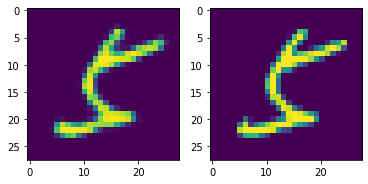

In [ ]:
plt.subplot(1,2,1)
plt.imshow(pred.detach().cpu().numpy()[1][0])
plt.subplot(1,2,2)
plt.imshow(img.detach().cpu().numpy()[1][0])
plt.show()


In [ ]:
torch.save(model.state_dict(),'./conv_autoencoder.pth')